<a href="https://colab.research.google.com/github/Greatreyhan/Flower_Classification/blob/master/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
image_shape = (224,224)
Classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=image_shape+(3,))
])

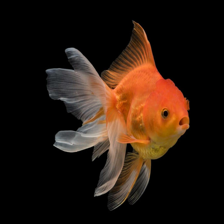

In [3]:
gold_fish = Image.open("fish.jpg").resize(image_shape)
gold_fish

In [4]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [5]:
gold_fish[np.newaxis, ...]

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]])

In [6]:
result = Classifier.predict(gold_fish[np.newaxis, ...])
result

1/1 [==============================] - 8s 8s/step


array([[ 0.23160908,  2.5753572 , 10.905947  , ..., -2.516852  ,
         0.35586   ,  0.89578986]], dtype=float32)

In [7]:
predicted_label = np.argmax(result)
predicted_label

2

In [8]:
image_labels = []
with open("ImageNetLabels.txt",'r') as f:
  image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [9]:
image_labels[predicted_label]

'goldfish'

Flower Dataset

In [10]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.',untar=True)

In [11]:
data_dir

'./datasets/flower_photos'

In [12]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [13]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/4510350093_3700064215.jpg'),
 PosixPath('datasets/flower_photos/dandelion/11296320473_1d9261ddcb.jpg'),
 PosixPath('datasets/flower_photos/dandelion/16510864164_3afa8ac37f.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4155914848_3d57f50fc7.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8691437509_9ac8441db7_n.jpg')]

In [14]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [15]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3697780051_83e50a6dd1_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3231873181_faf2da6382.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6347846935_51e3dc2481_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3494252600_29f26e3ff0_n.jpg')]

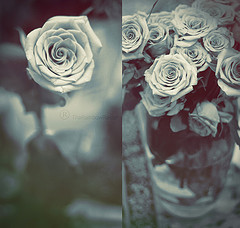

In [16]:
Image.open(str(roses[0]))

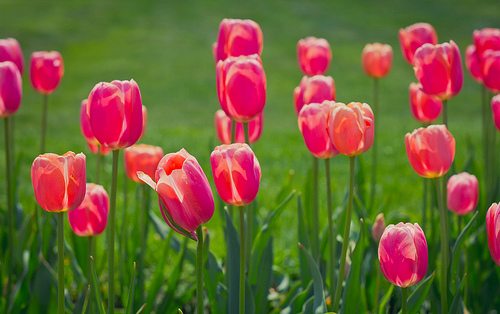

In [17]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

**Read flowers images from disk into numpy array using opencv**

In [18]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

In [19]:
flowers_images_labels = {
    'roses': 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [20]:
flowers_images_dict['roses'][1]

PosixPath('datasets/flower_photos/roses/3231873181_faf2da6382.jpg')

In [21]:
img = cv2.imread(str(flowers_images_dict['roses'][1]))

In [22]:
img.shape

(333, 500, 3)

In [23]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [24]:
X, y = [], []
for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(224,224))
    X.append(resized_img)
    y.append(flowers_images_labels[flower_name])

In [25]:
X = np.array(X)
y = np.array(y)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [27]:
X_train_scaled = X_train /255.0
X_test_scaled = X_test/255.0

In [28]:
X[1].shape

(224, 224, 3)

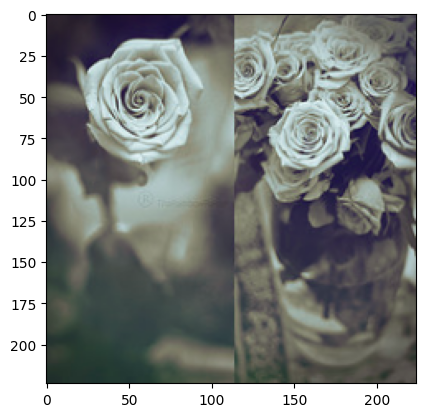

In [29]:
plt.imshow(X[0])

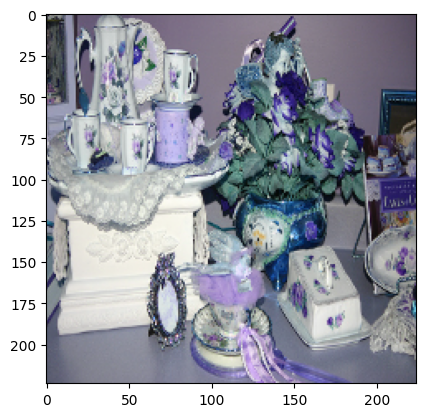

In [30]:
plt.imshow(X[1])

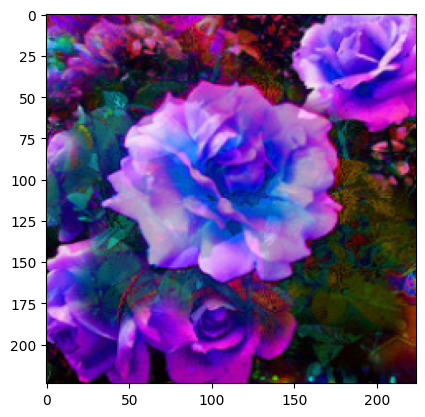

In [31]:
plt.imshow(X[2])

In [32]:
predicted = Classifier.predict([X[:3]])
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 1s/step


array([795, 795, 795])

In [33]:
image_labels[predicted[1]]

'shower curtain'

**Pre-trained Model**

In [34]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model = hub.KerasLayer(feature_extractor_model, input_shape=(224,224,3), trainable=False)

In [35]:
num_flower_label = 5

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_flower_label)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

model.fit(X_train_scaled, y_train, epochs=5)

In [ ]:
model.evaluate(X_test_scaled,y_test)